In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Data Preparation

Missing values originally represented by "?" were first converted to NULL during SQL preprocessing. 
These NULL values were then replaced with "Unknown" in categorical variables to retain all records 
and explicitly capture missing categories for analysis.
No missing values or significant outliers were observed in numerical variables 
after initial inspection, indicating acceptable data quality for quantitative analysis.

## Post-SQL Data Validation in Python

After performing initial data cleaning and missing value handling in SQL, 
the cleaned dataset was exported as a CSV file and loaded into Python for further analysis.

In this step, we validate the results of the SQL preprocessing by:
- Confirming the dataset structure and data types
- Verifying the number of observations and features
- Checking the presence and distribution of the "Unknown" category introduced during cleaning
- Ensuring no duplicate records were introduced during the data pipeline

This validation step ensures consistency between the SQL preprocessing stage 
and the Python-based exploratory data analysis.


In [3]:
adult = pd.read_csv('adult_clean.csv')
adult.info()
adult.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(32561, 15)

In [4]:
(adult == 'Unknown').sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native_country     583
fnlwgt               0
education            0
education_num        0
age                  0
marital_status       0
relationship         0
sex                  0
race                 0
capital_gain         0
capital_loss         0
hours_per_week       0
income               0
dtype: int64

the most 'Unknown' records are in occupation and workclass columns

In [5]:
adult.duplicated().sum()

np.int64(24)

Adult dataset contains 24 duplicate rows 

### Statistics of Numerical Features
To gain an overall understanding of the numerical variables, we examine their 
summary statistics, including central tendency, dispersion, and range. 
This provides a baseline for identifying distributional patterns and potential anomalies.

In [6]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The dataset contains 32,561 observations after initial cleaning.

- **Age**  
We analyze the distribution of age to understand the demographic structure 
of the dataset and identify dominant age groups.

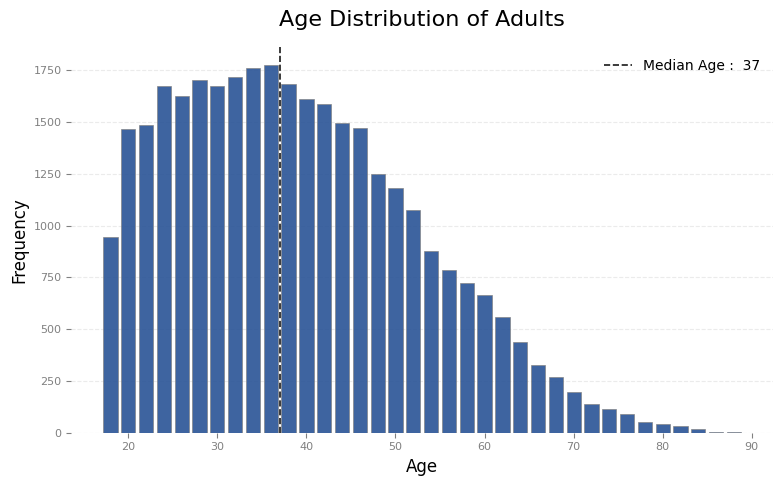

In [7]:
import matplotlib.pyplot as plt

median_age = adult['age'].median()


plt.figure(figsize=(8, 5))

plt.hist(
    adult['age'],
    bins = range(17, 91, 2), 
    color='#295396',
    edgecolor='gray',
    linewidth=0.5,
    rwidth=0.8,
    alpha=0.9,
)
plt.axvline(median_age, color='black' , linestyle='--' , linewidth=1.2 ,alpha=0.9 , label=f'Median Age : {median_age : .0f}')
plt.legend(frameon=False, loc='upper right')

plt.title('Age Distribution of Adults',family ='DejaVu Sans' ,fontsize=16, fontweight='normal', pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)



ax = plt.gca()
ax.set_xticks(range(20, 91, 10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.grid(axis='y', linestyle='--', alpha=0.25)
ax.set_axisbelow(True)
plt.tight_layout()
ax.tick_params(
    axis='both',
    colors='gray',
    labelsize=8
)
plt.show()

The age distribution shows a median of 37 years and an average age of approximately 38.6 years, indicating a slightly right-skewed distribution. Most individuals fall within the economically active age range, with the interquartile range spanning from 28 to 48 years. No extreme outliers are observed in the data.

- **Education Level (`education_num`)**  
  Education levels are centered around 10 years, corresponding roughly to high-school education. The range is limited (1–16), indicating a well-bounded and ordinal feature suitable for direct modeling.

- **Hours per Week**  
  The median working time is 40 hours per week, indicating a standard full-time work pattern. The interquartile range (40–45) is relatively narrow, while higher values may capture additional predictive signal.

- **Final Weight (`fnlwgt`)**  
  The `fnlwgt` feature shows a wide dispersion and represents a census sampling weight rather than an intrinsic individual characteristic. This feature will not be used for predictive modeling.

- **Capital Gain and Capital Loss**  
Capital gain values are highly skewed with a large proportion of zero values. 
Therefore, we focus on non-zero observations and apply a logarithmic scale 
to better visualize the distribution.

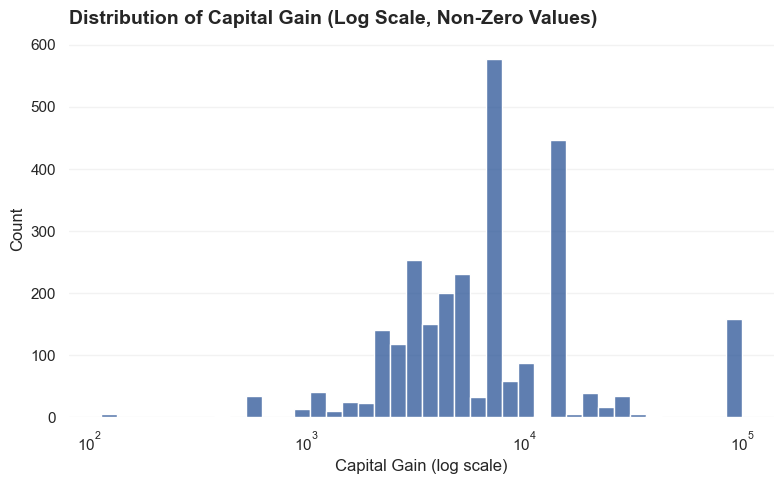

In [8]:
sns.set_theme(style="whitegrid")

capital_gain_nonzero = adult.loc[adult['capital_gain'] > 0, 'capital_gain']

plt.figure(figsize=(8, 5))

ax = sns.histplot(
    capital_gain_nonzero,
    bins=40,
    log_scale=True,
    color="#295396",
    edgecolor='white'
)

ax.set_title(
    "Distribution of Capital Gain (Log Scale, Non-Zero Values)",
    fontsize=14,
    weight='bold',
    pad=12,
    loc='left'
)
ax.set_xlabel("Capital Gain (log scale)")
ax.set_ylabel("Count")

ax.yaxis.grid(True, alpha=0.25)
ax.xaxis.grid(False)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Both variables are highly right-skewed, with more than 75% of values equal to zero. 
A small number of extreme values (e.g., capital_gain up to 99,999) suggest that 
feature transformation or binarization may be considered in subsequent modeling steps.

Overall, numerical features such as age, education level, working hours, and capital gains 
exhibit meaningful structure and are expected to contribute to income-related analysis, 
while skewed financial variables require careful interpretation.

### Cardinality of Categorical Features
To assess the complexity of categorical variables and their suitability for analysis 
and encoding, we examine the number of unique categories in each feature.

In [9]:
category_cols = [
    'workclass',
    'education',
    'marital_status',
    'occupation',
    'relationship',
    'sex',
    'race',
    'native_country'
]
for col in category_cols:
    print(col , adult[col].nunique())

workclass 9
education 16
marital_status 7
occupation 15
relationship 6
sex 2
race 5
native_country 42


To assess the complexity of categorical variables, we computed the number of unique categories in each feature:

- `workclass`: 9  
- `education`: 16  
- `marital_status`: 7  
- `occupation`: 15  
- `relationship`: 6  
- `sex`: 2  
- `race`: 5  
- `native_country`: 42  

Most categorical features have low-to-moderate cardinality and are straightforward to analyze and encode. However, `native_country` has high cardinality (42 categories), which may introduce sparsity and noise; it will likely require grouping (e.g., "Other") or careful handling in later preprocessing.

### Distribution of Categorical Features
We examine the relative frequency distributions of categorical variables to understand 
class imbalance, identify rare categories, and assess the prevalence of missing or 
unknown values

In [11]:
for col in category_cols:
    display(adult[col].value_counts(normalize=True))

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
Unknown             0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: proportion, dtype: float64

education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: proportion, dtype: float64

marital_status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: proportion, dtype: float64

occupation
Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
Unknown              0.056601
Transport-moving     0.049046
Handlers-cleaners    0.042075
Farming-fishing      0.030527
Tech-support         0.028500
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
Name: proportion, dtype: float64

relationship
Husband           0.405178
Not-in-family     0.255060
Own-child         0.155646
Unmarried         0.105832
Wife              0.048156
Other-relative    0.030128
Name: proportion, dtype: float64

sex
Male      0.669205
Female    0.330795
Name: proportion, dtype: float64

race
White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: proportion, dtype: float64

native_country
United-States                 0.895857
Mexico                        0.019748
Unknown                       0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua 

The distribution of categorical variables was examined to identify dominant categories, rare classes, and the presence of the `unknown` category.

Most features exhibit a small number of dominant categories, while others show long-tail distributions with many low-frequency classes. In particular, `occupation` and `native_country` display higher cardinality and more dispersed distributions, which may introduce noise if not handled carefully.

The `unknown` category appears in multiple features, especially in `workclass` and `occupation`, and will be treated as a valid category rather than removed at this stage.

### Workload Analysis Across Occupations
To explore how working hours vary across job categories independently of income, 
we analyze the average weekly working hours by occupation.

In [12]:
occ_df = adult[adult['occupation'] != 'Unknown']
occ_hours = (
    occ_df
    .groupby('occupation')['hours_per_week']
    .mean()
    .sort_values(ascending=False)
)

occ_hours.head(10)

occupation
Farming-fishing      46.989940
Exec-managerial      44.987703
Transport-moving     44.656230
Protective-serv      42.870570
Prof-specialty       42.386715
Craft-repair         42.304221
Sales                40.781096
Machine-op-inspct    40.755744
Armed-Forces         40.666667
Tech-support         39.432112
Name: hours_per_week, dtype: float64

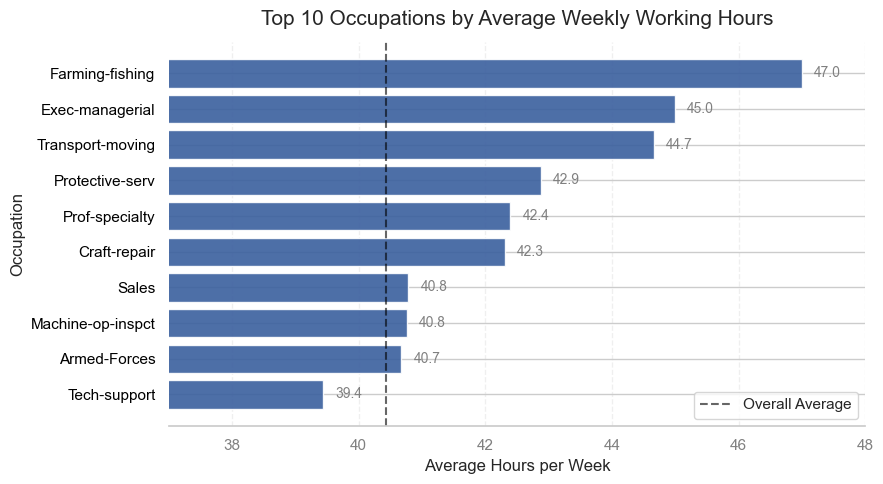

In [13]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.barh(
    occ_hours.head(10).index,
    occ_hours.head(10).values,
    color='#3A5F9E',
    alpha=0.9
)
ax.set_xlim(37, 48)

ax.invert_yaxis()

for i, v in enumerate(occ_hours.head(10).values):
    ax.text(v + 0.2, i, f'{v:.1f}', va='center', fontsize=10, color='gray')

ax.set_title(
    'Top 10 Occupations by Average Weekly Working Hours',
    fontsize=15,
    pad=12
)
ax.set_xlabel('Average Hours per Week', fontsize=12)
ax.set_ylabel('Occupation', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='black')

plt.axvline(
    adult['hours_per_week'].mean(),
    linestyle='--',
    label='Overall Average',
    color='black',
    alpha=0.6
)
plt.legend()


ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


This analysis examines the average weekly working hours across different occupations to better understand workload distribution independent of income levels. Occupations with unknown values were excluded to ensure clarity and interpretability of the results.

The chart highlights the top 10 occupations with the highest average working hours per week. Farming-fishing roles show the highest workload, with an average close to 47 hours per week, followed by executive managerial and transport-related occupations. Most of these occupations are positioned above the overall average working hours (indicated by the dashed reference line), suggesting moderately higher workload requirements compared to the general workforce.

However, the differences between occupations are relatively moderate, typically ranging between approximately 39 and 47 hours per week. This indicates that while certain job categories tend to require longer working hours, workload intensity varies gradually rather than drastically across occupations. Overall, the findings suggest that working hours are influenced by the nature of the job itself rather than income level alone.

### Relationship Between Marital Status and Household Role

To better understand household structure, we examine the relationship between 
marital status and individual role within the household. This analysis highlights 
how these two categorical features overlap and differ in representing family structure.

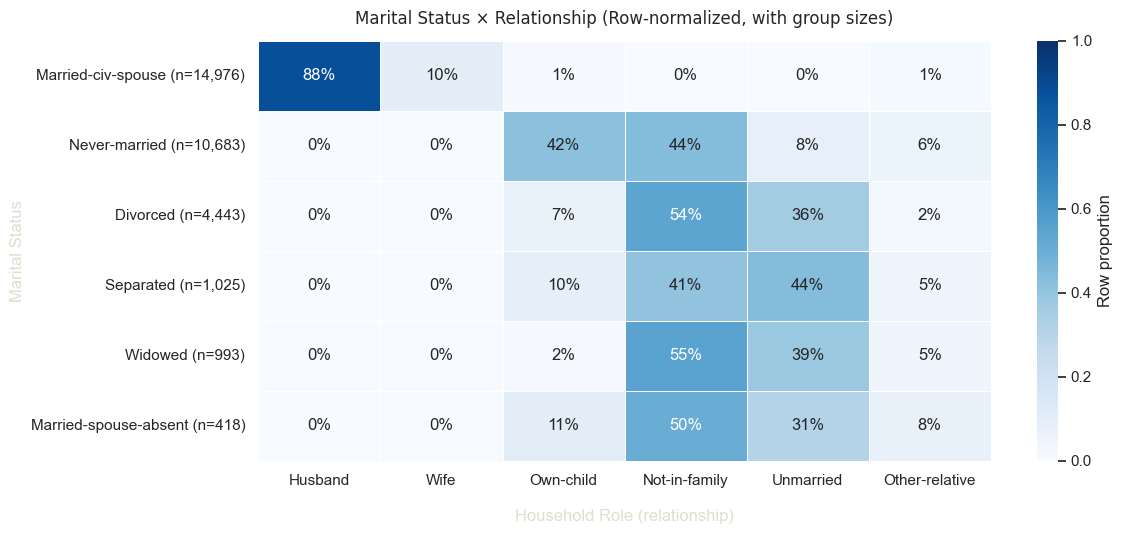

In [14]:
row_counts = adult['marital_status'].value_counts()

heatmap_data = pd.crosstab(
    adult['marital_status'],
    adult['relationship'],
    normalize='index'
)

min_n = 200
valid_rows = row_counts[row_counts >= min_n].index
heatmap_data = heatmap_data.loc[valid_rows]

heatmap_data = heatmap_data.loc[row_counts.loc[heatmap_data.index].sort_values(ascending=False).index]

col_order = ['Husband','Wife','Own-child','Not-in-family','Unmarried','Other-relative']
col_order = [c for c in col_order if c in heatmap_data.columns]
heatmap_data = heatmap_data[col_order]

heatmap_data.index = [f"{idx} (n={row_counts[idx]:,})" for idx in heatmap_data.index]

plt.figure(figsize=(12, 5.5))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0%",
    cmap="Blues",
    vmin=0, vmax=1,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Row proportion"}
)
ax.set_title("Marital Status × Relationship (Row-normalized, with group sizes)", pad=12 , family='DejaVu Sans')
ax.set_xlabel("Household Role (relationship)" , labelpad=15 , color='#DEDED1')
ax.set_ylabel("Marital Status" ,color='#DEDED1')

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The heatmap illustrates the relationship between marital status and household role, 
with values representing the proportion of individuals within each marital status 
category. Strong alignment is observed for married individuals, while divorced, 
widowed, and never-married groups exhibit more diverse household roles.

This analysis highlights partial redundancy between these features, while also 
demonstrating that each captures distinct aspects of household structure

In [15]:
adult['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

### Target Variable Distribution
After understanding the basic structure and quality of the dataset, the next step is to examine income distribution, as income is considered the primary target variable in this dataset.

In [16]:
adult['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Income level plays a central role in many socioeconomic analyses; therefore, understanding its distribution and relationship with other attributes is a critical step before deeper exploration.

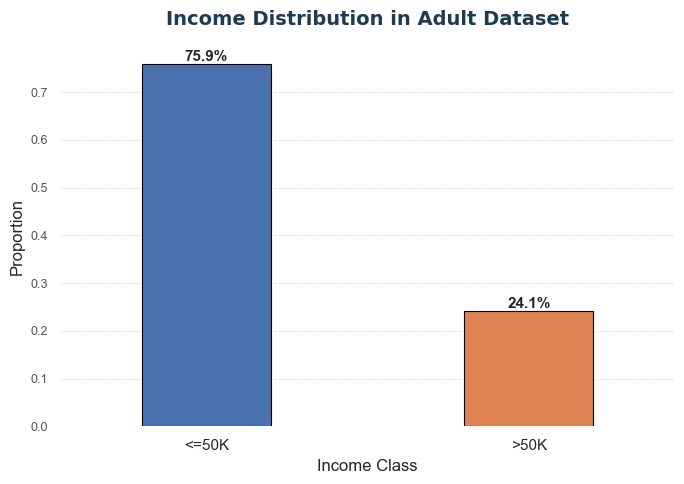

In [17]:
income_dist = adult['income'].value_counts(normalize=True)
plt.figure(figsize=(7, 5))
ax = income_dist.plot(
    kind='bar',
    width=0.4,
    color=['#4C72B0', '#DD8452'],
    edgecolor='black'
)
ax.set_title("Income Distribution in Adult Dataset",
             family = 'DejaVu Sans',
             fontsize=14, 
             weight='bold' , 
             color='#1B3C53',
             pad=15)
ax.set_ylabel("Proportion", fontsize=12)
ax.set_xlabel("Income Class", fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.yticks(color="#555555" , fontsize = 9)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height()*100:.1f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        p.set_linewidth(0.8),
        ha='center',
        va='bottom',
        fontsize=11,
        weight='bold'
    )
sns.despine(left=True, bottom=True)
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.tight_layout()

The target variable (`income`) is binary, representing whether an individual earns more than 50K annually.

The distribution is noticeably imbalanced: approximately 75.9% of individuals earn ≤50K, while only 24.1% earn >50K. This class imbalance should be considered during model development, particularly when selecting evaluation metrics and baseline models.

### Age Distribution Vs Income

C:\Users\HP\AppData\Local\Temp\ipykernel_12352\541216819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


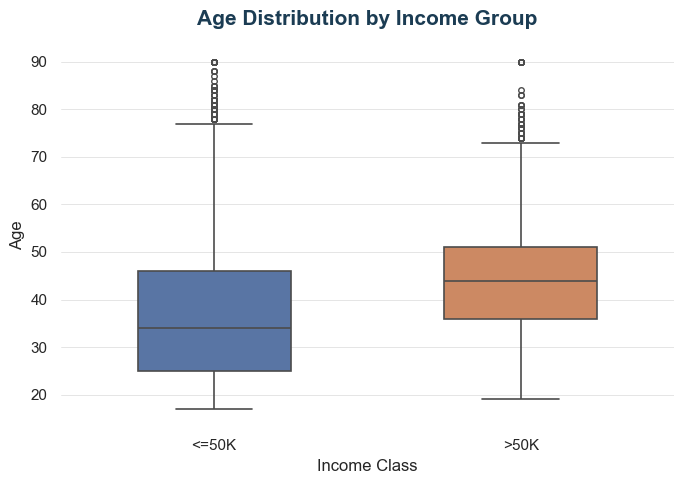

In [18]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7, 5))

ax = sns.boxplot(
    x='income',
    y='age',
    data=adult,
    width=0.5,
    palette=['#4C72B0', '#DD8452'],
    linewidth=1.2,
    fliersize=4
)

ax.set_title(
    "Age Distribution by Income Group",
    fontsize=15,
    weight='bold',
    color='#1B3C53',
    pad=14
)
ax.set_xlabel("Income Class", fontsize=12)
ax.set_ylabel("Age", fontsize=12)

ax.yaxis.grid(True, linewidth=0.6, alpha=0.6)
ax.xaxis.grid(False)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [19]:
for col in category_cols:
    display(pd.crosstab(
    adult[col],
    adult['income'],
    normalize='index').sort_values(by='>50K', ascending=False))

income,<=50K,>50K
workclass,,
Self-emp-inc,0.442652,0.557348
Federal-gov,0.613542,0.386458
Local-gov,0.705208,0.294792
Self-emp-not-inc,0.715073,0.284927
State-gov,0.728043,0.271957
Private,0.781327,0.218673
Unknown,0.895969,0.104031
Never-worked,1.000000,0.000000
Without-pay,1.000000,0.000000


income,<=50K,>50K
education,,
Doctorate,0.259080,0.740920
Prof-school,0.265625,0.734375
Masters,0.443413,0.556587
Bachelors,0.585247,0.414753
Assoc-voc,0.738784,0.261216
Assoc-acdm,0.751640,0.248360
Some-college,0.809765,0.190235
HS-grad,0.840491,0.159509
12th,0.923788,0.076212


income,<=50K,>50K
marital_status,,
Married-civ-spouse,0.553152,0.446848
Married-AF-spouse,0.565217,0.434783
Divorced,0.895791,0.104209
Widowed,0.914401,0.085599
Married-spouse-absent,0.918660,0.081340
Separated,0.935610,0.064390
Never-married,0.954039,0.045961


income,<=50K,>50K
occupation,,
Exec-managerial,0.515986,0.484014
Prof-specialty,0.550966,0.449034
Protective-serv,0.674884,0.325116
Tech-support,0.695043,0.304957
Sales,0.730685,0.269315
Craft-repair,0.773359,0.226641
Transport-moving,0.799624,0.200376
Adm-clerical,0.865517,0.134483
Machine-op-inspct,0.875125,0.124875


income,<=50K,>50K
relationship,,
Wife,0.524872,0.475128
Husband,0.551429,0.448571
Not-in-family,0.896930,0.103070
Unmarried,0.936738,0.063262
Other-relative,0.962283,0.037717
Own-child,0.986780,0.013220


income,<=50K,>50K
sex,,
Male,0.694263,0.305737
Female,0.890539,0.109461


income,<=50K,>50K
race,,
Asian-Pac-Islander,0.734360,0.265640
White,0.744140,0.255860
Black,0.876120,0.123880
Amer-Indian-Eskimo,0.884244,0.115756
Other,0.907749,0.092251


income,<=50K,>50K
native_country,,
Iran,0.581395,0.418605
France,0.586207,0.413793
India,0.600000,0.400000
Taiwan,0.607843,0.392157
Japan,0.612903,0.387097
Yugoslavia,0.625000,0.375000
Cambodia,0.631579,0.368421
Italy,0.657534,0.342466
England,0.666667,0.333333


### Categorical Features vs Target Variable

To assess the relationship between categorical features and income level, we computed normalized cross-tabulations against the target variable (`income`). This allows comparison of the proportion of individuals earning more than 50K within each category.

Several categorical features show strong associations with income, while others exhibit weaker or noisier patterns. Features with clear separation between income groups are likely to be informative predictors, whereas high-cardinality or weakly differentiated features may require grouping or careful preprocessing in later stages.


#### Education vs Income

<Figure size 1200x700 with 0 Axes>

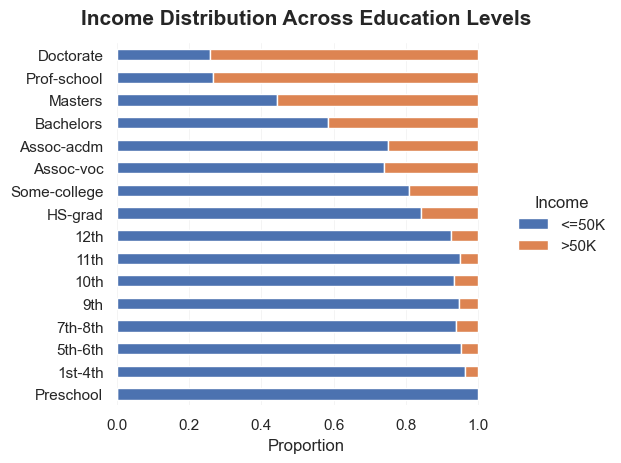

In [20]:
edu_income = pd.crosstab( adult['education'], adult['income'], normalize='index' ) 
education_order = [ 'Preschool',
                    '1st-4th',
                    '5th-6th',
                    '7th-8th',
                    '9th',
                    '10th',
                    '11th',
                    '12th',
                    'HS-grad',
                    'Some-college',
                    'Assoc-voc',
                    'Assoc-acdm',
                    'Bachelors',
                    'Masters',
                    'Prof-school',
                    'Doctorate' ] 
edu_income = edu_income.loc[education_order]


sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

ax = edu_income.plot(
    kind='barh',         
    stacked=True,
    color=['#4C72B0', '#DD8452'],
    edgecolor='white'     
)

ax.set_title(
    "Income Distribution Across Education Levels",
    fontsize=15,
    weight='bold',
    pad=14
)
ax.set_xlabel("Proportion", fontsize=12)
ax.set_ylabel("", fontsize=12)

ax.xaxis.grid(True, linewidth=0.6, alpha=0.25)
ax.yaxis.grid(False)


ax.legend(
    title="Income",
    frameon=False,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5)
)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Education level shows a strong and consistent relationship with income. Individuals with advanced degrees (e.g., Masters, Doctorate, Prof-school) have a substantially higher proportion of income >50K, while lower education levels (e.g., HS-grad, Some-college) are predominantly associated with income ≤50K. This feature is expected to be one of the strongest predictors of income.

#### Marital Status vs Income
Marital status demonstrates a strong association with income. Married individuals show a significantly higher likelihood of earning more than 50K compared to never-married or separated individuals. This suggests that marital status captures important socioeconomic patterns relevant to income.

#### Occupation vs Income

Occupation exhibits meaningful variation in income distribution, with certain occupations strongly associated with higher income levels. However, the feature contains many categories with uneven frequencies, indicating that grouping or dimensionality reduction may be necessary to reduce noise during modeling.

#### Native Country vs Income

While some variation in income distribution exists across countries, the signal is relatively weak for most categories. Given the high cardinality and dominance of a small number of countries, this feature may contribute limited predictive value unless appropriately grouped.

#### Sensitive Attributes (Sex and Race)

Differences in income distribution are observed across sex and race categories. These features may reflect underlying societal biases and should be handled with caution. Their inclusion or exclusion will be carefully considered in later modeling stages.

### Key Insights from Categorical Features

Categorical features such as education, marital status, and occupation exhibit strong relationships with income and are likely to be important predictors. Other features, including native country and race, show weaker or noisier patterns and may require careful handling. No categorical features are removed at this stage, as all decisions are deferred to preprocessing and modeling phases.

### 📊 Correlation Analysis of Numerical Features with Income

In [21]:
adult['income_binary'] = adult['income'].map({'<=50K': 0, '>50K': 1})

adult['log_capital_gain'] = np.log1p(adult['capital_gain'])
adult['log_capital_loss'] = np.log1p(adult['capital_loss'])

corr_df = adult[
    [
        'income_binary',
        'age',
        'hours_per_week',
        'log_capital_gain',
        'log_capital_loss'
    ]
].corr()


corr_with_target = corr_df['income_binary'].sort_values(ascending=False)
corr_with_target


income_binary       1.000000
log_capital_gain    0.289462
age                 0.234037
hours_per_week      0.229689
log_capital_loss    0.141146
Name: income_binary, dtype: float64

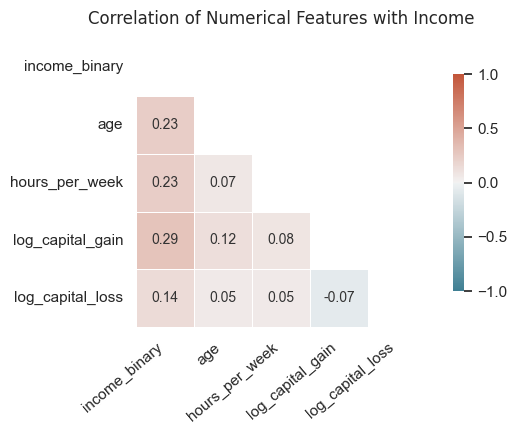

In [22]:
plt.figure(figsize=(6.5, 4.5))

mask = np.triu(np.ones_like(corr_df, dtype=bool))

blue_cmap = sns.diverging_palette(220, 20, as_cmap=True)
annot_kws={"color": "#333333", "size": 10}

ax = sns.heatmap(
    corr_df,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap = blue_cmap,
    center=0,
    vmin=-1, vmax=1,       
    linewidths=0.6,
    linecolor='white',
    square=True,
    annot_kws={"color": "#333333", "size": 10},                 
    cbar_kws={"shrink": 0.75}
)

ax.set_title(
    "Correlation of Numerical Features with Income",
    family = 'DejaVu Sans',
    fontsize=12,
    weight="normal",
    pad=10
)


ax.tick_params(axis='x', rotation=40)

plt.setp(ax.get_xticklabels(), ha='right')


ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.tight_layout()

plt.show()



To examine linear relationships between numerical variables and income, the target variable was encoded as a binary label (`<=50K = 0`, `>50K = 1`).

Due to strong skewness and zero inflation, `capital_gain` and `capital_loss` were log-transformed using `log(1 + x)`.

### Correlation with Income

- `log_capital_gain` shows the strongest positive correlation with income (~0.29)
- `age` and `hours_per_week` exhibit moderate positive correlations (~0.23)
- `log_capital_loss` has a weaker but still positive association (~0.14)

Overall, no single numerical feature strongly explains income on its own, suggesting that income is driven by multiple interacting factors rather than a single dominant variable.